In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from functools import reduce
from collections import Counter
import re
df = pd.read_csv('Preprocessed.csv')

In [ ]:
df.head()

,User,Date Created,Followers count,Number of Likes,Tweet,Location,Verified,Retweeted,Retweet count,hashtag,Tweet_tokens
0,peter,2023-02-06,221,13817,cbknews121 breaking news connected share cbkne...,NaN,False,False,274,"['KlausSchwab', 'HunterBiden', 'Ukraine']","['cbknews', '121', 'breaking', 'news', 'connec..."
1,Rich is in the ICU,2023-02-06,1783,73346,leopard,Unceded Algonquin Territory,False,False,96,"['Ukraine', 'UkraineRussiaWar', 'UkraineWar', ...",['leopard']
2,Cїndy,2023-02-06,683,312127,sometimes people warm clothes cause 5 heat mad...,Все – Україна,False,False,15,[],"['sometimes', 'people', 'warm', 'clothes', 'ca..."
3,Taras Hatalyak,2023-02-06,125,233,mil delta,Ukraine,False,False,25,[],"['mil', 'delta']"
4,忍者猫,2023-02-06,724,1322,11,NaN,False,False,11,"['ウクライナ', 'Ukraine']",['11']


In [ ]:
df.tail()

,User,Date Created,Followers count,Number of Likes,Tweet,Location,Verified,Retweeted,Retweet count,hashtag,Tweet_tokens
19995,Дмитрий Момот,2023-02-06,66,56534,pro promote next thing make th,NaN,False,False,18,[],"['pro', 'promote', 'next', 'thing', 'make', 'th']"
19996,Tras el valle de Aranaz,2023-02-06,128,8291,jjaranaz94 con el aybhb3kqhp covid19 covid 19 ...,Lee aquí 👇🏼 el último TEVDA,False,False,5,"['COVID19', 'Covid_19', 'COVIDー19', 'Covid', '...","['jjaranaz', '94', 'con', 'el', 'aybhb', '3kqh..."
19997,Tras el valle de Aranaz,2023-02-06,128,8291,n90i1em2qa covid19 covid 19 covid 19 covid,Lee aquí 👇🏼 el último TEVDA,False,False,23,"['Orgullo', 'docente', 'COVID19', 'Covid_19', ...","['n90i1em2qa', 'covid', '19', 'covid', '19', '..."
19998,Tras el valle de Aranaz,2023-02-06,128,8291,ser je52x9drmo covid19 covid 19 covid 19 covid,Lee aquí 👇🏼 el último TEVDA,False,False,40,"['COVID19', 'Covid_19', 'COVIDー19', 'Contagios...","['ser', 'je52x9drmo', 'covid', '19', 'covid', ..."
19999,heattedabora,2023-02-06,1,2,complete 1st mission war russia hz4sa0xusa,France,False,False,0,"['war', 'UkraineRussianWar', 'Ukraine', 'russia']","['complete', '1st', 'mission', 'war', 'russia'..."


In [ ]:
df.describe()

,Followers count,Number of Likes
count,20000.000000,20000.00000
mean,4716.987100,60669.36430
std,33793.136241,127164.45564
min,0.000000,0.00000
25%,83.000000,1862.00000
50%,270.000000,11540.00000
75%,1337.000000,58601.00000
max,448132.000000,928272.00000


In [ ]:
print('Shape of Dataframe -> {}' .format(df.shape))

Shape of Dataframe -> (20000, 11)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             20000 non-null  object
 1   Date Created     20000 non-null  object
 2   Followers count  20000 non-null  int64 
 3   Number of Likes  20000 non-null  int64 
 4   Tweet            19659 non-null  object
 5   Location         11922 non-null  object
 6   Verified         19171 non-null  object
 7   Retweeted        20000 non-null  object
 8   Retweet count    20000 non-null  object
 9   hashtag          20000 non-null  object
 10  Tweet_tokens     20000 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [2]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [3]:
return_missing_values(df)

Tweet       0.019182
Location    0.396475
dtype: float64

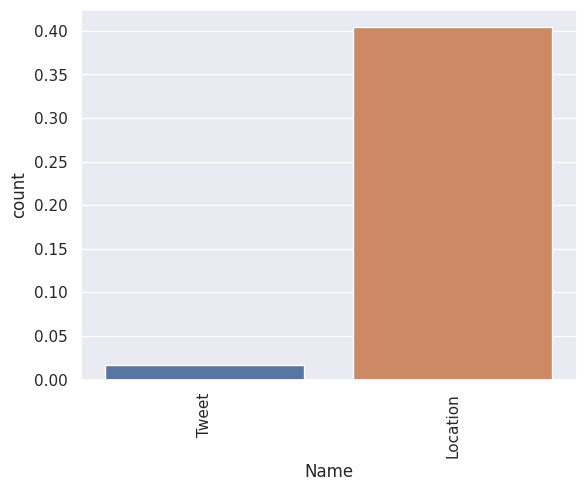

In [ ]:
plot_missing_values(df)

<Axes: >

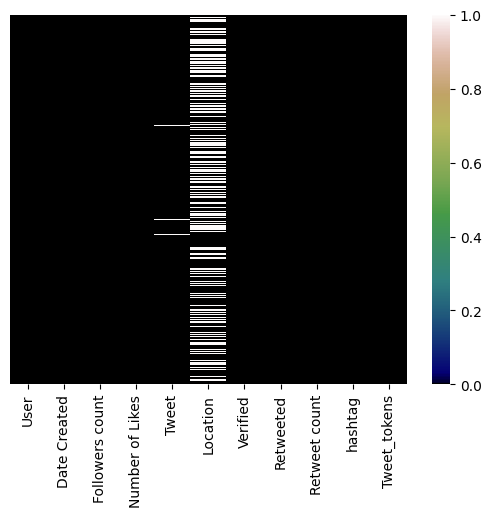

In [4]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='gist_earth')

In [5]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [6]:
unidf = return_unique_values(df)
print(unidf)

           Features  Uniques
0              User      286
1      Date Created        1
2   Followers count      259
3   Number of Likes      541
4             Tweet      261
5          Location      128
6          Verified        2
7         Retweeted        1
8     Retweet count      111
9           hashtag      177
10     Tweet_tokens      262


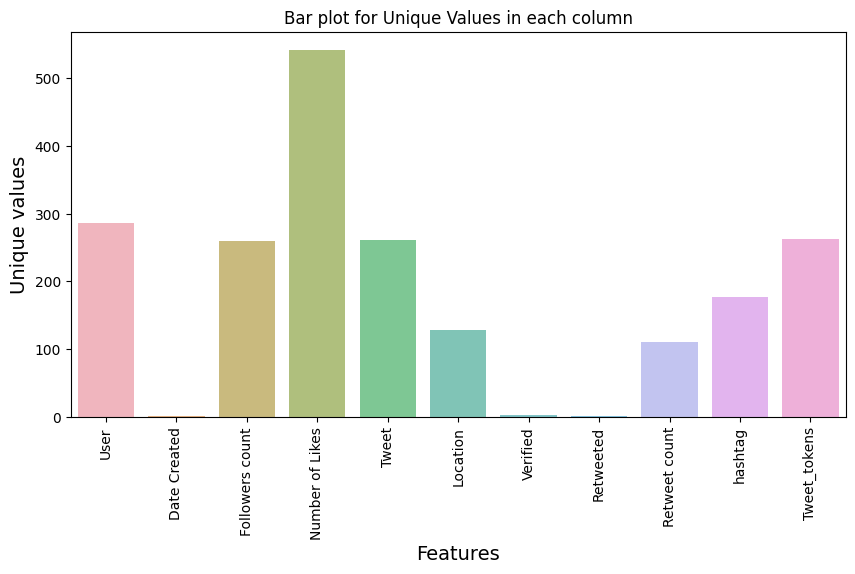

In [7]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [8]:
def extract_strings(s):
    regex = r"'(.*?)'"
    matches = re.findall(regex, s)
    return matches

In [9]:
l = reduce(lambda x, y: list(x)+list(y), zip(df['Tweet_tokens']))
flatten = [item for sublist in l for item in extract_strings(sublist)]
print(flatten)
# word = []
counts = Counter(flatten).most_common()
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))

['cbknews', '121', 'breaking', 'news', 'connected', 'share', 'cbknews', '121', 'leopard', 'sometimes', 'people', 'warm', 'clothes', 'cause', '5', 'heat', 'made', 'small', 'giving', 'mil', 'delta', '11', 'n', 'amt', 'n', 'sent', 'die', 'seine', 'n', 'y6oavygthf', 'jjaranaz', '94', 'en', 'la', '5xyfiteta8', 'covid', '19', 'covid', '19', 'covid', '19', 'covid', 'western', 'media', 'report', 'bombshell', 'revelation', 'former', 'prime', 'minister', 'western', 'blocked', 'shot', 'hell', 'holding', '7yeemwe7va', 'shore', '2021', 'die', 'sie', 'wird', 'den', 'podium', 'f', 'r', 'former', 'us', 'blocked', 'russia', 'peace', 'deal', 'us', 'western', '8hwuu4uxy35qlxm', 'leopard', '2', 'a4', 'projectile', 'hit', 'trench', 'lucky', 'one', 'went', 'pick', 'wounded', 'continued', 'prosecutor', 'general', 'office', 'legion', 'declared', 'terrorist', 'arthurm', '4033082', '4', 'eu', 'assistance', 'fight', 'human', 'arms', 'smuggling', 'propaganda', '2015', 'wblwxfouv', '6', 'ready', 'provide', 'suppor

In [10]:
df2.head(10)

,Phrase,Count
0,c o v i d,5592
1,1 9,4521
2,r u s s i a,4103
3,w a r,2155
4,d e,1213
5,l,1111
6,w e s t e r n,1097
7,f o r m e r,1045
8,b l o c k e d,1006
9,r,982


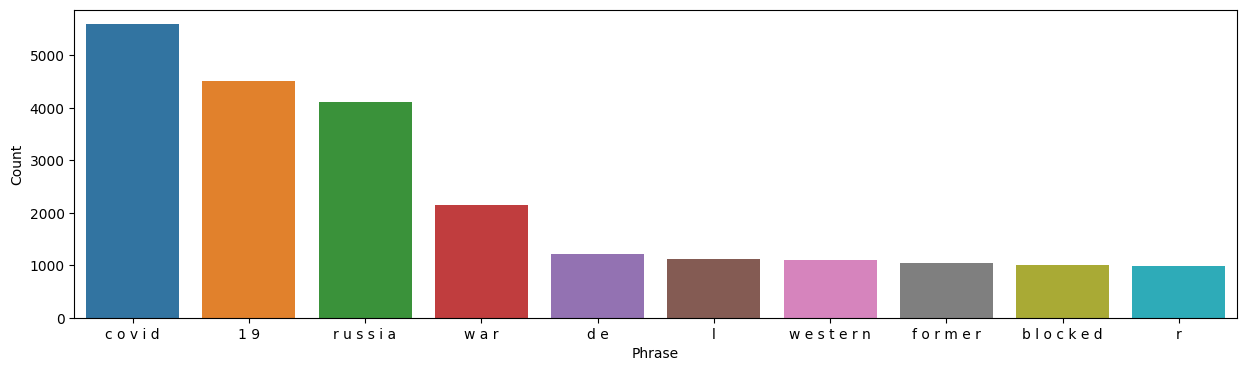

In [11]:
df2 = df2.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df2, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [12]:
l = reduce(lambda x, y: list(x)+list(y), zip(df['hashtag']))
flatten = [item for sublist in l for item in extract_strings(sublist)]
print(flatten)
# word = []
counts = Counter(flatten).most_common()
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))

['KlausSchwab', 'HunterBiden', 'Ukraine', 'Ukraine', 'UkraineRussiaWar', 'UkraineWar', 'Leopard', 'CatsOfTwitter', 'CatsOnTwitter', 'RussiaisATerroistState', 'UkraineWarNew', 'ウクライナ', 'Ukraine', 'Johnson', 'COVID19', 'Covid_19', 'COVIDー19', 'Contagios', 'Positivo', 'Covid', 'Ucrania', 'Ukraine', 'Marinka', 'Ukraine', 'Ukraine', 'Kampfjets', 'Baerbock', 'StrackZimmermann', 'Ukraine', 'Uk', 'Russian', 'Moldova', 'EU', 'Ukraine', 'Ukraine', 'Ukraine', 'Turkey', 'TurkeyEarthquake', 'Ukraine', 'Twitter', 'Anonymous', 'OpIran', 'OpRussia', 'Iran', 'Ukraine', 'Baerbock', 'StrackZimmermann', 'Ukraine', 'Ukraine', 'Nord', 'Ukraine', 'photography', 'art', 'Twitter', 'Nowar', 'Universe', 'relaxation', 'cooperation', 'sky', 'streetart', 'architecture', 'beauty', 'Canada', 'Germany', 'News', 'USA', 'EU', 'UK', 'France', 'Italia', 'Ukraine', 'ukraine', 'europe', 'russia', 'china', 'france', 'germany', 'estonia', 'lithuania', 'latvia', 'Hörgeschicht', 'Ukraine', 'Nord', 'Russia', 'RussiaUkraineWar', 

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


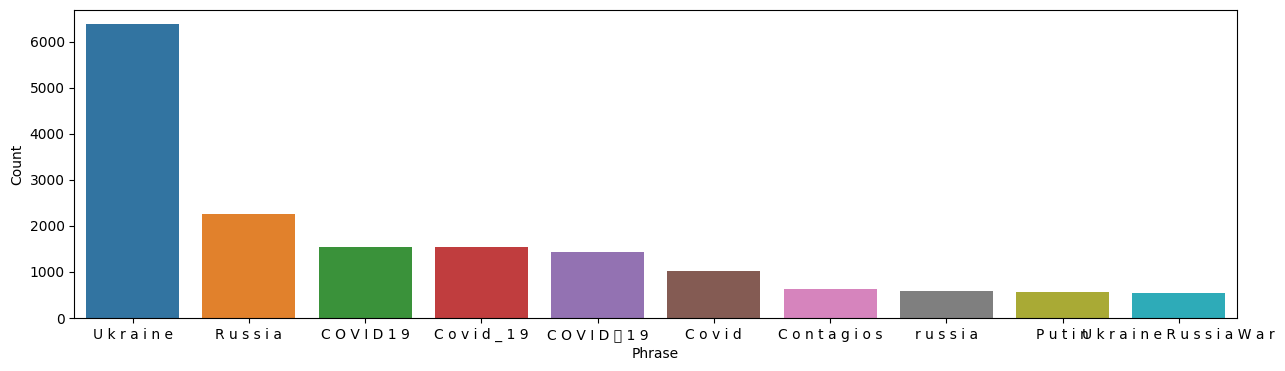

In [13]:
df2 = df2.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df2, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

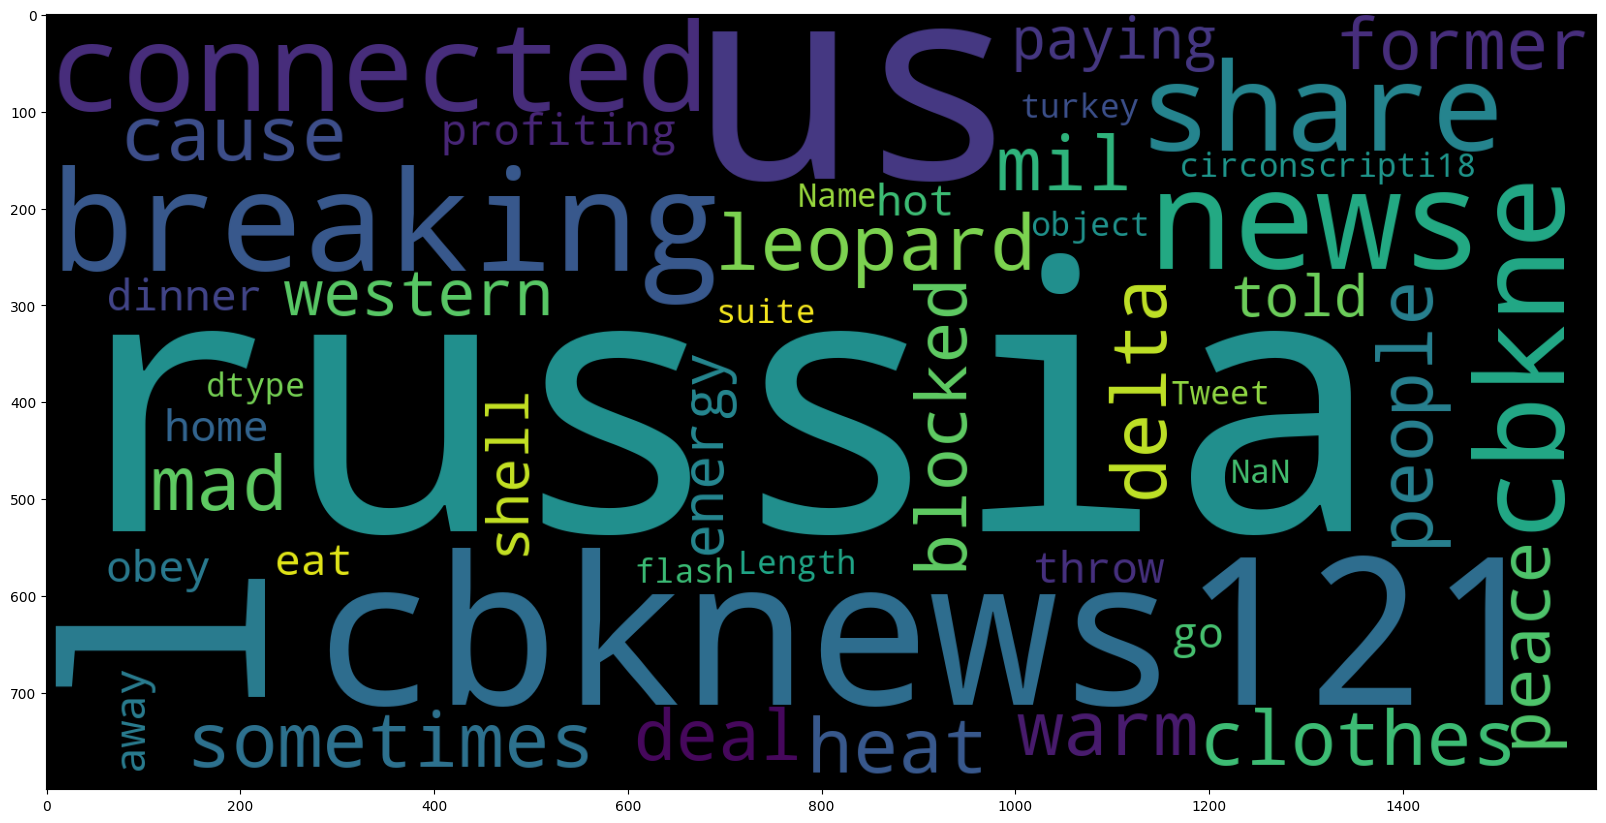

In [17]:
data_neg = df['Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800, collocations=False).generate("".join(str(data_neg)))
plt.imshow(wc)

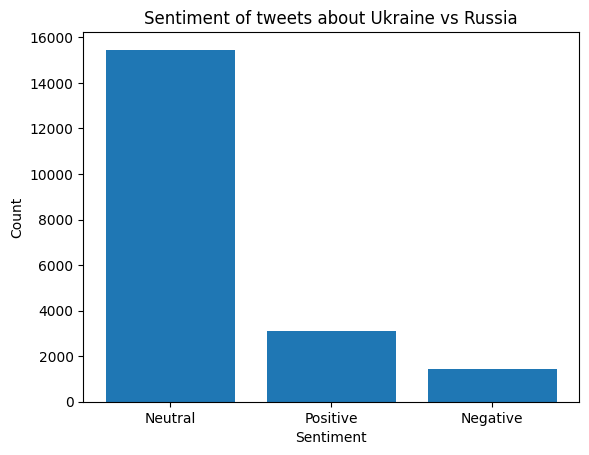

In [19]:
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart showing the number of positive, negative, and neutral tweets
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment of tweets about Ukraine vs Russia')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()